In [21]:
import numpy as np
import glob
import datetime
from datetime import date
from datetime import timedelta
import datetime
from dateutil.relativedelta import relativedelta
from datetime import datetime
import pandas as pd
import os
from netCDF4 import Dataset
import netCDF4 as nc
import matplotlib.pyplot as plt# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing



In [22]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Split the data into features (X) and target variable (y)
X = df['DIS'].values


kkkk = 1

amplitudes
[1.24389685 0.08350211 0.19558148 0.30580856 0.04145304 0.08727633
 0.02414018 0.02881432 0.03823296 0.0704018  0.07962462]
min amplitude
0.024140178663287534
max amplitude
1.243896853248729
angular frequencies
[0.25132741 0.50265482 0.75398224 1.00530965 1.25663706 1.50796447
 1.75929189 2.0106193  2.26194671 2.51327412 2.76460154]
min angular frequency
0.25132741228718347
max angular frequency
2.764601535159018


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_14899/781914282.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  series_sum = a_0 + np.sum(a * np.cos(2 * np.pi * n * t / T) + b * np.sin(2 * np.pi * n * t / T) for n, (a, b) in enumerate(zip(a_n, b_n), 1))


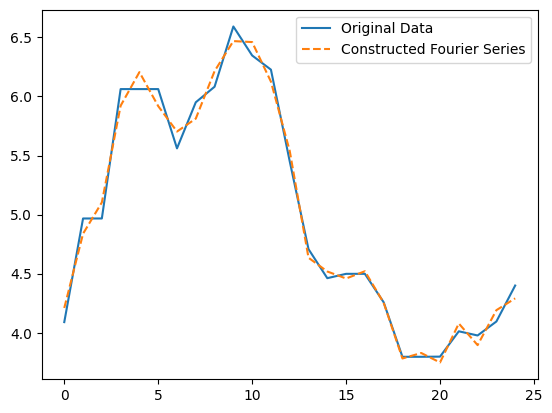

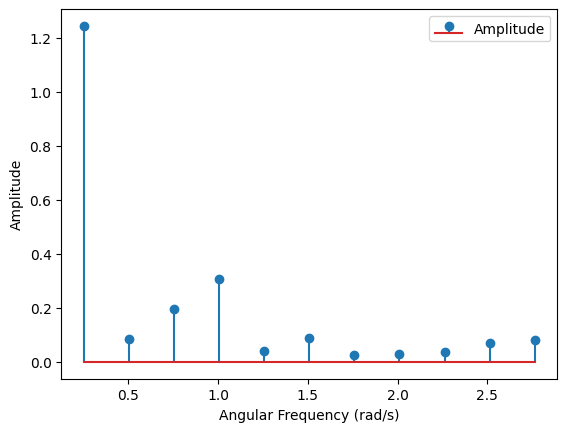

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def compute_fourier_series(data, T):
    N = len(data)
    dt = T / N
    t = np.arange(0, T, dt)

    # Compute the Fourier coefficients using FFT
    fft_result = np.fft.fft(data)
    a_0 = fft_result[0].real / N
    a_n = 2 * np.real(fft_result[1:N//2]) / N
    b_n = -2 * np.imag(fft_result[1:N//2]) / N

    # Compute amplitude and angular frequency
    amplitude = np.abs(np.sqrt(a_n**2 + b_n**2))
    angular_frequency = 2 * np.pi * np.arange(1, len(amplitude) + 1) / T

    return a_0, a_n, b_n, amplitude, angular_frequency

def construct_fourier_series(t, a_0, a_n, b_n, T):
    series_sum = a_0 + np.sum(a * np.cos(2 * np.pi * n * t / T) + b * np.sin(2 * np.pi * n * t / T) for n, (a, b) in enumerate(zip(a_n, b_n), 1))
    return series_sum

def calculate_amplitude_and_fourier_series(start_index,end_index):
    T = end_index - start_index  # Period
    t_sample = np.linspace(0, T, T, endpoint=False)
    data_sample = X[start_index:end_index]

    # Compute Fourier series coefficients
    a_0, a_n, b_n, amplitude, angular_frequency = compute_fourier_series(data_sample, T)

    print('amplitudes')
    print(amplitude)
    print('min amplitude')
    print(np.min(amplitude))
    print('max amplitude')
    print(np.max(amplitude))
    print('angular frequencies')
    print(angular_frequency)
    print('min angular frequency')
    print(np.min(angular_frequency))
    print('max angular frequency')
    print(np.max(angular_frequency))
    # Reconstruct the Fourier series
    reconstructed_series = construct_fourier_series(t_sample, a_0, a_n, b_n, T)

    # Plot original data and reconstructed series
    plt.plot(t_sample, data_sample, label='Original Data')
    plt.plot(t_sample, reconstructed_series, label='Constructed Fourier Series', linestyle='--')
    plt.legend()

    # Plot amplitude and angular frequency
    plt.figure()
    plt.stem(angular_frequency, amplitude, label='Amplitude')
    plt.xlabel('Angular Frequency (rad/s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()


calculate_amplitude_and_fourier_series(0,25)


amplitudes
[2.40760655 0.60304338 0.26729351 0.43650984 0.0932997  0.22031719
 0.17298352 0.33711443 0.3470929  0.172099   0.06881826 0.10959119
 0.11182741 0.09707872 0.26294008 0.14059704 0.05458245 0.07850214
 0.1726216  0.05781342 0.02956079 0.07718198 0.01386195 0.10666558
 0.04831315 0.05793237 0.14822988 0.08049231 0.04727644 0.0862505
 0.03862828 0.03936881 0.07666702 0.02467206 0.01608157 0.04892993
 0.0218355  0.03852704 0.08090898 0.04152805 0.07898617 0.1210262
 0.02671604 0.02655775 0.01799172 0.01405827 0.0406232  0.05652695
 0.01846299 0.11551601 0.05187954 0.03481002 0.0599084  0.02536125
 0.04591625 0.06566877]
min amplitude
0.01386194696428429
max amplitude
2.4076065486735354
angular frequencies
[0.05463639 0.10927279 0.16390918 0.21854558 0.27318197 0.32781836
 0.38245476 0.43709115 0.49172755 0.54636394 0.60100033 0.65563673
 0.71027312 0.76490952 0.81954591 0.8741823  0.9288187  0.98345509
 1.03809149 1.09272788 1.14736427 1.20200067 1.25663706 1.31127346
 1.365909

/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_14899/781914282.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  series_sum = a_0 + np.sum(a * np.cos(2 * np.pi * n * t / T) + b * np.sin(2 * np.pi * n * t / T) for n, (a, b) in enumerate(zip(a_n, b_n), 1))


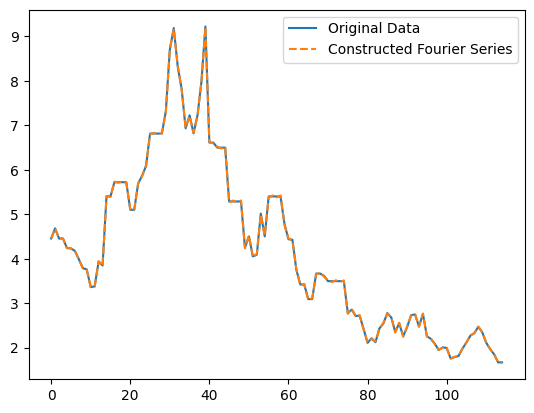

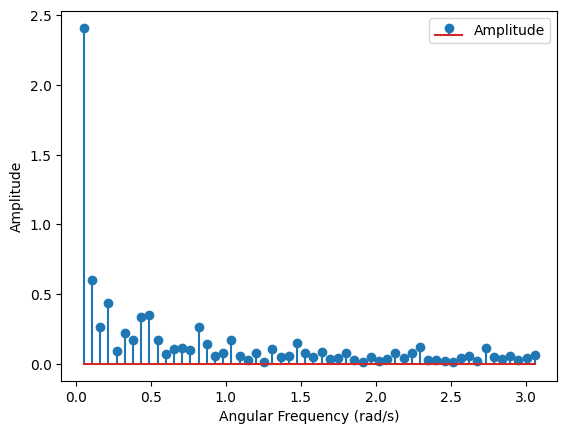

In [24]:
calculate_amplitude_and_fourier_series(25,140)


amplitudes
[2.17505    0.86617713 0.44908513 0.50141555 0.15583555 0.24012534
 0.14428066 0.13442863 0.20950233 0.13830575 0.11866879 0.09689979
 0.03140948 0.06514303 0.09133234 0.01428849 0.05470334 0.01948853
 0.02278144 0.05774149 0.06990472 0.0510061  0.03061849 0.06050403
 0.07863853 0.06454319 0.06324744 0.09080936 0.05123912 0.04990005
 0.03115597 0.04326648 0.03206322 0.02220422 0.05699242 0.05344568
 0.07338384 0.11977193 0.1115107 ]
min amplitude
0.014288489121909647
max amplitude
2.175050003908908
angular frequencies
[0.07853982 0.15707963 0.23561945 0.31415927 0.39269908 0.4712389
 0.54977871 0.62831853 0.70685835 0.78539816 0.86393798 0.9424778
 1.02101761 1.09955743 1.17809725 1.25663706 1.33517688 1.41371669
 1.49225651 1.57079633 1.64933614 1.72787596 1.80641578 1.88495559
 1.96349541 2.04203522 2.12057504 2.19911486 2.27765467 2.35619449
 2.43473431 2.51327412 2.59181394 2.67035376 2.74889357 2.82743339
 2.9059732  2.98451302 3.06305284]
min angular frequency
0.078539

/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_14899/781914282.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  series_sum = a_0 + np.sum(a * np.cos(2 * np.pi * n * t / T) + b * np.sin(2 * np.pi * n * t / T) for n, (a, b) in enumerate(zip(a_n, b_n), 1))


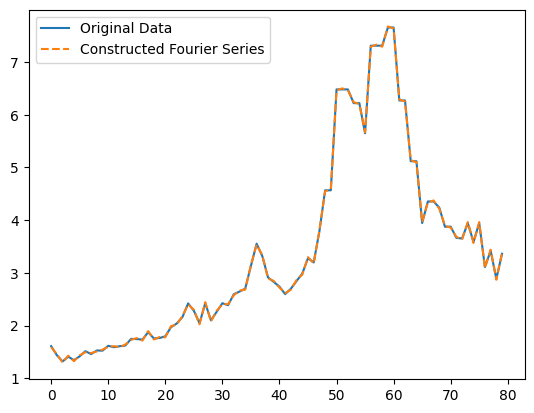

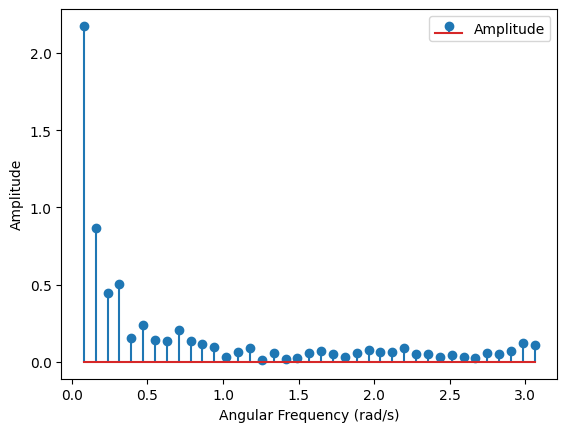

In [25]:
calculate_amplitude_and_fourier_series(140,220)




amplitudes
[2.35929643 0.97214482 0.50548239 0.47471176 0.15225735 0.35963877
 0.28505558 0.23862437 0.27902765 0.08789687 0.21059779 0.17745833
 0.20607152 0.26972337]
min amplitude
0.08789687366453952
max amplitude
2.3592964256300606
angular frequencies
[0.20943951 0.41887902 0.62831853 0.83775804 1.04719755 1.25663706
 1.46607657 1.67551608 1.88495559 2.0943951  2.30383461 2.51327412
 2.72271363 2.93215314]
min angular frequency
0.20943951023931953
max angular frequency
2.9321531433504737


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_14899/781914282.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  series_sum = a_0 + np.sum(a * np.cos(2 * np.pi * n * t / T) + b * np.sin(2 * np.pi * n * t / T) for n, (a, b) in enumerate(zip(a_n, b_n), 1))


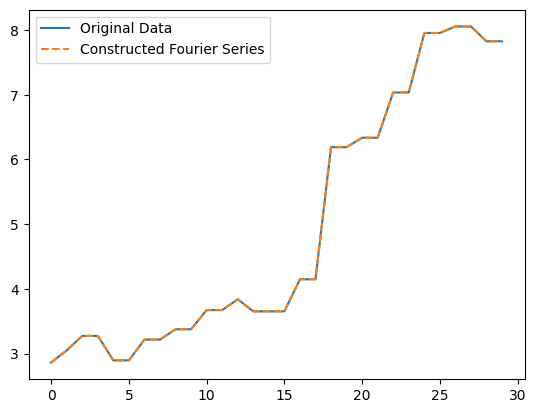

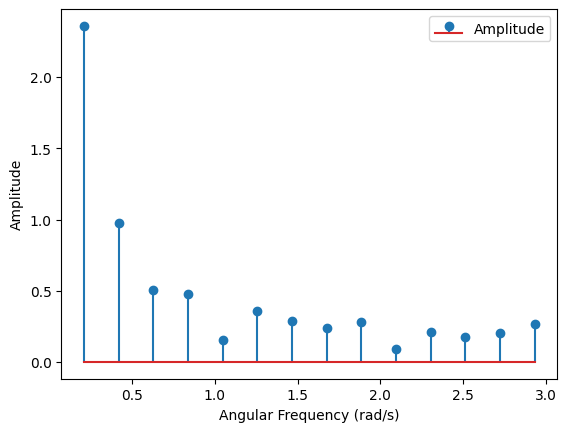

In [26]:
calculate_amplitude_and_fourier_series(220,250)




amplitudes
[1.61757422 0.99206422 0.90950707 1.6021785  1.007164   0.39120706
 0.51450497 0.36086763 0.14108815 0.10808976 0.28634686 0.23649001
 0.08424007 0.30205511 0.16978973 0.26796062 0.01370718 0.12842906
 0.04876978 0.18229071 0.08436832 0.17030661 0.19224517 0.11389084
 0.20477932 0.13025041 0.0445562  0.12960497 0.12743433]
min amplitude
0.013707182531536811
max amplitude
1.617574224687013
angular frequencies
[0.10471976 0.20943951 0.31415927 0.41887902 0.52359878 0.62831853
 0.73303829 0.83775804 0.9424778  1.04719755 1.15191731 1.25663706
 1.36135682 1.46607657 1.57079633 1.67551608 1.78023584 1.88495559
 1.98967535 2.0943951  2.19911486 2.30383461 2.40855437 2.51327412
 2.61799388 2.72271363 2.82743339 2.93215314 3.0368729 ]
min angular frequency
0.10471975511965977
max angular frequency
3.0368728984701336


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_14899/781914282.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  series_sum = a_0 + np.sum(a * np.cos(2 * np.pi * n * t / T) + b * np.sin(2 * np.pi * n * t / T) for n, (a, b) in enumerate(zip(a_n, b_n), 1))


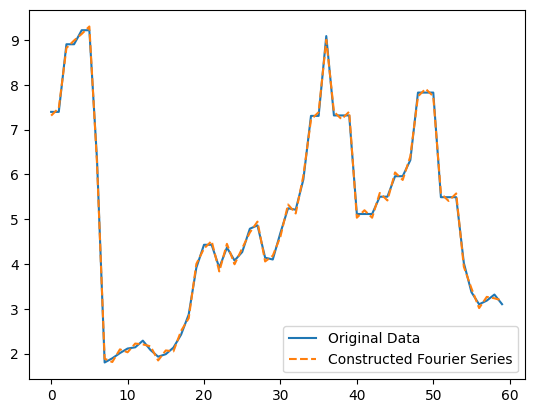

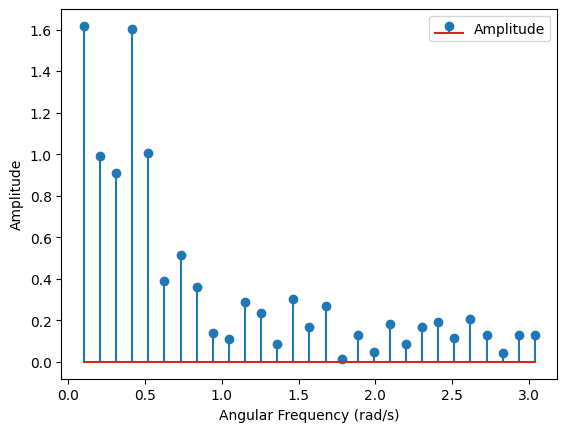

In [27]:
calculate_amplitude_and_fourier_series(250,310)



amplitudes
[1.19742585 1.0233752  1.00581444 0.45418579 0.57969874 0.48487068
 0.37009639 0.08234526 0.17299555 0.30801573 0.39682571 0.22101874
 0.07617985 0.15080905 0.2050122  0.19176483 0.16978795 0.10307519
 0.21667929]
min amplitude
0.07617985274681185
max amplitude
1.197425854660307
angular frequencies
[0.15707963 0.31415927 0.4712389  0.62831853 0.78539816 0.9424778
 1.09955743 1.25663706 1.41371669 1.57079633 1.72787596 1.88495559
 2.04203522 2.19911486 2.35619449 2.51327412 2.67035376 2.82743339
 2.98451302]
min angular frequency
0.15707963267948966
max angular frequency
2.9845130209103035


/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_14899/781914282.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  series_sum = a_0 + np.sum(a * np.cos(2 * np.pi * n * t / T) + b * np.sin(2 * np.pi * n * t / T) for n, (a, b) in enumerate(zip(a_n, b_n), 1))


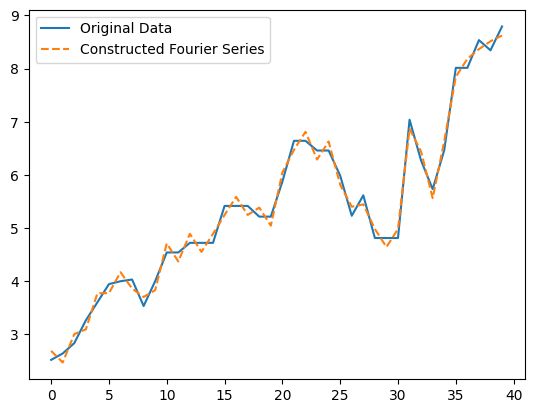

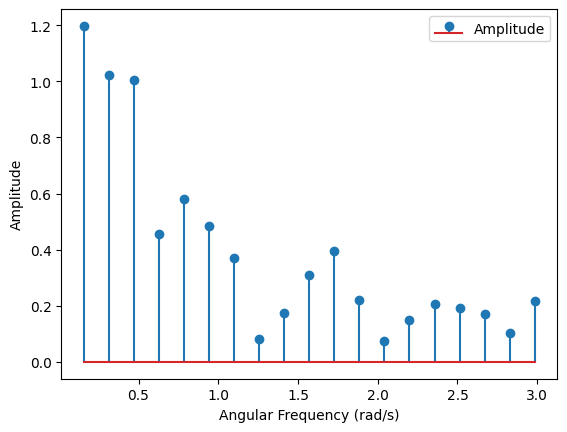

In [28]:
calculate_amplitude_and_fourier_series(310,350)



amplitudes
[0.99255513 0.61193925 0.67510762 0.76885881 0.64253033 0.65599741
 0.61280893 0.51071689 0.35932454 0.39439454 0.49175809 0.59715668
 0.53324738 0.37787083 0.31676294 0.28987771 0.27269691 0.27281024
 0.24574955 0.22197022 0.22580039 0.16088045 0.0962527  0.08698838
 0.09953206 0.03508891 0.04495248 0.04289642 0.02923815 0.07086512
 0.09812328 0.10400156 0.07982681 0.09513915 0.10405928 0.11369824
 0.10455248 0.12386375 0.11104692 0.10817105 0.12710642 0.10001538
 0.09244673 0.10137248 0.08993596 0.0933683  0.08854523 0.06200807
 0.02806603 0.01552892 0.04190306 0.05200852 0.00720421 0.03040322
 0.04500207 0.05382534 0.06502673 0.05710774 0.06932518 0.0868251
 0.09136187 0.08752295 0.06149546 0.08438192 0.10923003 0.12525579
 0.10884549 0.08676595 0.08632689 0.08935517 0.08716755 0.09078808
 0.06011235 0.04026828 0.04067863 0.05135943 0.05663129]
min amplitude
0.00720421103069061
max amplitude
0.9925551286241312
angular frequencies
[0.04027683 0.08055366 0.12083049 0.161107

/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_14899/781914282.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  series_sum = a_0 + np.sum(a * np.cos(2 * np.pi * n * t / T) + b * np.sin(2 * np.pi * n * t / T) for n, (a, b) in enumerate(zip(a_n, b_n), 1))


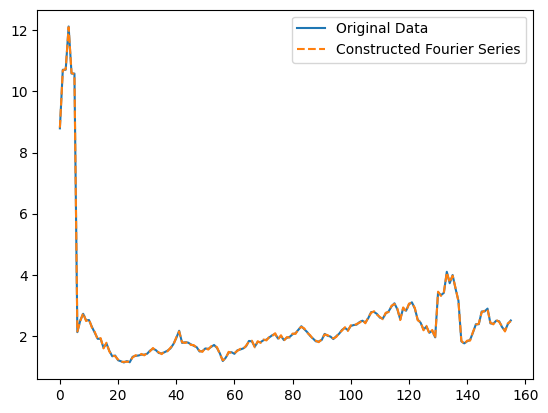

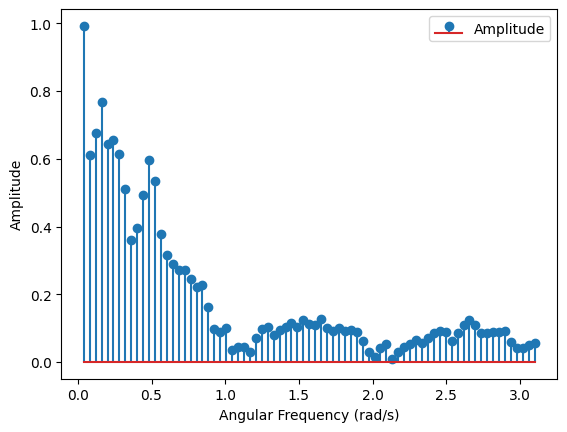

In [29]:
calculate_amplitude_and_fourier_series(350,506)



amplitudes
[0.61804412 1.72154575 0.62330718 0.80878033 0.33716513 0.36477347
 0.54705507 0.10028223 0.8214638  0.70104407 0.82860645 0.16810991
 0.43181124 0.2688583  0.31474755 0.30481827 0.03118174 0.02183053
 0.53997498 0.29403295 0.30834034 0.12529441 0.15265381 0.06652301
 0.17738802 0.23823106 0.10842293 0.15775743 0.15733181 0.2515775
 0.26119117 0.18043881 0.22384991 0.06804304 0.13619733 0.12587155
 0.13490641 0.18561874 0.18195548 0.04828919 0.1428656  0.04474962
 0.08507828 0.08878713 0.13405224 0.2117525  0.12114349 0.06059208
 0.05944559 0.11167174 0.08748634 0.0966049  0.07027533 0.05016305
 0.07701697 0.14629378 0.0993675  0.06104498 0.04850331 0.04512796
 0.06910768 0.11522399 0.06284878 0.10987685 0.1166185  0.17847644
 0.10912672 0.08883767 0.01568611 0.03523232 0.08350226 0.0994323
 0.04178711 0.02572402 0.10158669 0.06159563 0.08999689 0.06717176
 0.01610374 0.04334051 0.04457377 0.06626202 0.05110539 0.04790216
 0.04348603 0.00385215 0.07936369 0.0178384  0.002429

/var/folders/1f/9_2wggdd2ygfkk69t5zj8cyh0000gr/T/ipykernel_14899/781914282.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  series_sum = a_0 + np.sum(a * np.cos(2 * np.pi * n * t / T) + b * np.sin(2 * np.pi * n * t / T) for n, (a, b) in enumerate(zip(a_n, b_n), 1))


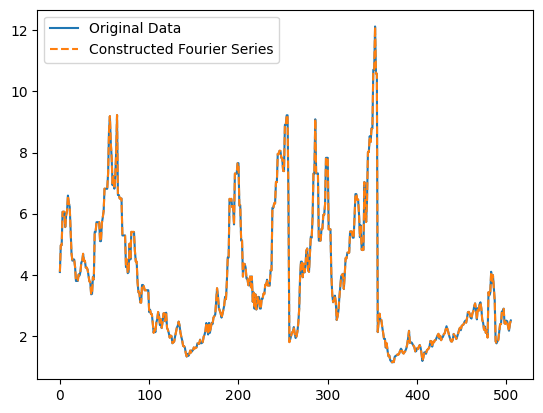

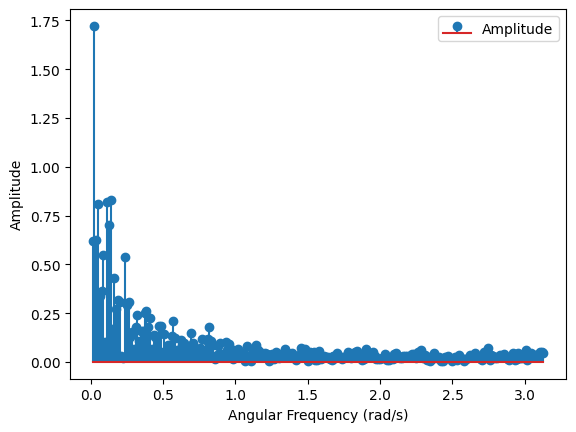

In [30]:
calculate_amplitude_and_fourier_series(0,506)